# MINI PROJECT (DATA - 690)

## My Issue Of Interest.
* 
The aim of my project is to compare the GDP with average electric consumption per head and GDP with pollutants per sq mile of each state in us .

## Importance of This Issue.
* In this mordernised world, pollution and power consumption are two burning issues. So I thought to do some EDA on how the emission of pollutants and usage of electricity is related to the states GDP.

## Questions I Want to Answer.

* Will the ascending order of Electric Consumption per capita of a state be almost same as that of ascending order of GDP per capita of the states?

* will the pollutants per square mile of the states with higher GDP will be more ?

## Data Source Locations:-

* [US state wise GDP](https://data.world/garyhoov/gdp-by-state-2000-2015/workspace/file?filename=GDP+by+State+2000+2005+2010+2015+with+Share+and+Growth+Rate.xlsx)

* [State wise Carbon Dioxide Emissions](https://www.eia.gov/environment/emissions/state/analysis/)

* [US State wise power emissions](https://www.eia.gov/electricity/data/state/)

* [US State wise census](https://data.world/devtl/u-s-state-populations/workspace/file?filename=PEP_2016_PEPANNRES_with_ann.csv())

* [Area of each state in US](https://www.kaggle.com/giodev11/usstates-dataset#state-areas.csv)

## Unit of Analysis
* I will be analysing the US states electric counsumption per capita, pollution emitted per sq mile vs the GDP of each state.

## Variables/Measures Used in Analysis.
* I will be using GDP of each state, Carbon Dioxide emissions per each state, power consumption per each state, population of each state and area of each state

## Techniques Used.
* I am planning to use some line graphs for my visualization

In [1]:
# Importing required libraries
import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading GDP of State in us into df1 dataframe
df1 = pandas.read_excel("GDP by State 2000 2005 2010 2015 with Share and Growth Rate (1).xlsx")

In [4]:
# To display all the rows in a dataframe rows
pandas.set_option('display.max_rows', None)

In [6]:
# As there are columns other than the required columns consisting of GDP of the states, I going to delete those columns
#First I am going to drop all the columns with null values
df1 = df1.dropna(how='any',axis=0)

In [8]:
# LOading census data of states of unted states into a dataframe
df2 = pandas.read_csv("PEP_2016_PEPANNRES_with_ann (1).csv")

In [10]:
# I am taking the values of GDP in the year 2010 of each state into a list named list1
# I am taking the population of each state in the year 2010 into a list named list2
list1 = df1['2010 ($MM)'].to_list()
list2 = df2['respop72010'].tolist()

In [11]:
# I am slicing the list2 to get the desired values from the list
list2 = list2[2:53]

In [12]:
len(list1)

51

In [13]:
len(list2)

51

In [14]:
# Converting list2 from string to integer type
for i in range(0, len(list2)): 
    list2[i] = int(list2[i]) 

In [15]:
# Dividing the GDP of every state with its population and appending the values obtained into a new empty list
list3 = []
for i in range(0,51):
    list3.append(list1[i]/list2[i])

In [16]:
# Adding the new list to GDP dataframe with column name as GDP/POPULATION
df1['GDP/POPULATION']=list3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
# Creating a new dataframe with electricity generation of each state for every month from different energy recources
df3 = pandas.read_excel('generation_monthly.xlsx',
              sheet_name='2010-2011_FINAL')

In [20]:
# Dropping all the unwanted rows from the above data frame
# Deleting the rows with cell value as US-TOTAL as we dont need the those rows
df3.drop(df3.loc[df3['STATE']=='US-TOTAL' ].index, inplace=True)

In [21]:
# Droping all the rows representing 2011 data
df3.drop(df3.loc[df3['YEAR']==2011 ].index, inplace=True)

In [22]:
# Droping all the rows except the rows in which 'Energy SOURCE' column is not equal to total as the total column adds all the power 
# -generated through different resources in a month for that state
df3.drop(df3.loc[df3['ENERGY SOURCE'] !='Total' ].index, inplace=True)

In [24]:
# Creating new dataframe with state names and their abbrevations
df5 = pandas.read_csv("state-abbrevs (1).csv")

In [26]:
# Taking state names and their abbrevations into a dictionary with abbrevations as key and state names as values 
state_dict = dict(zip(df5.abbreviation, df5.state))

In [27]:
# Replacing the abbrevations of state names with state names using the state_dict dictionary created
df3=df3.replace({"STATE": state_dict}) 

In [28]:
# Creating a new pandas series which sum up the electricity generated grouped by satae names
a=df3.groupby(['STATE'])['GENERATION (Megawatthours)'].sum()

In [29]:
# Converting the pandas series to dataframe
dfnew = a.to_frame()

In [30]:
# Taking the power generated by each state into a list
list_Megawatt=dfnew['GENERATION (Megawatthours)'].to_list()

In [31]:
# Dividing the power generated by each state with its population and appending it to a new list
list_Megawattperpop = []
for i in range(0,51):
    list_Megawattperpop.append(list_Megawatt[i]/list2[i])

In [32]:
# Adding that list to df dataframe
df1['ELECTRICAL CONSUMPTION/POPULATION']=list_Megawattperpop 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
# Taking the pollution excel sheet into a dataframe
df_pollution = pandas.read_excel('table1 (1).xlsx',
              sheet_name='Sheet1',header = 4)

In [36]:
# Taking co2 emmissions of each state into a list
list_pollution = df_pollution[2010].to_list()

In [37]:
# Slicing the lis for desired values
list_pollution= list_pollution[0:51]

In [38]:
len(list_pollution)

51

In [39]:
# Taking the area of each state data ito a dataframe
df_area = pandas.read_csv("state-areas.csv")

In [41]:
list_area = df_area['area (sq. mi)'].to_list()

In [42]:
# Dividing the co2 emissions of each state with its area and appending those values to a list 
list_poll_area = []
for i in range(0,51):
    list_poll_area.append(list_pollution[i]/list_area[i])

In [43]:
# Addding that list as a column to a dataframe
df1['Pollution per Square mile'] = list_poll_area

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
# Generating a final new dateframe with required columns from df1 dataframe
df_final1 = df1[['Area','GDP/POPULATION','ELECTRICAL CONSUMPTION/POPULATION','Pollution per Square mile']]

In [47]:
# Assigning ranks to each column and adding it as rank1, rank2 and rank3 columns respectively
df_final1['RANK1'] = df_final1['GDP/POPULATION'].rank(ascending = 0) 
df_final1['RANK2'] = df_final1['ELECTRICAL CONSUMPTION/POPULATION'].rank(ascending = 0) 
df_final1['RANK3'] = df_final1['Pollution per Square mile'].rank(ascending = 0) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Question 1:  Will the ascending order of Electric Consumption per capita of a state be almost same as that of ascending order of GDP per capita of the states?


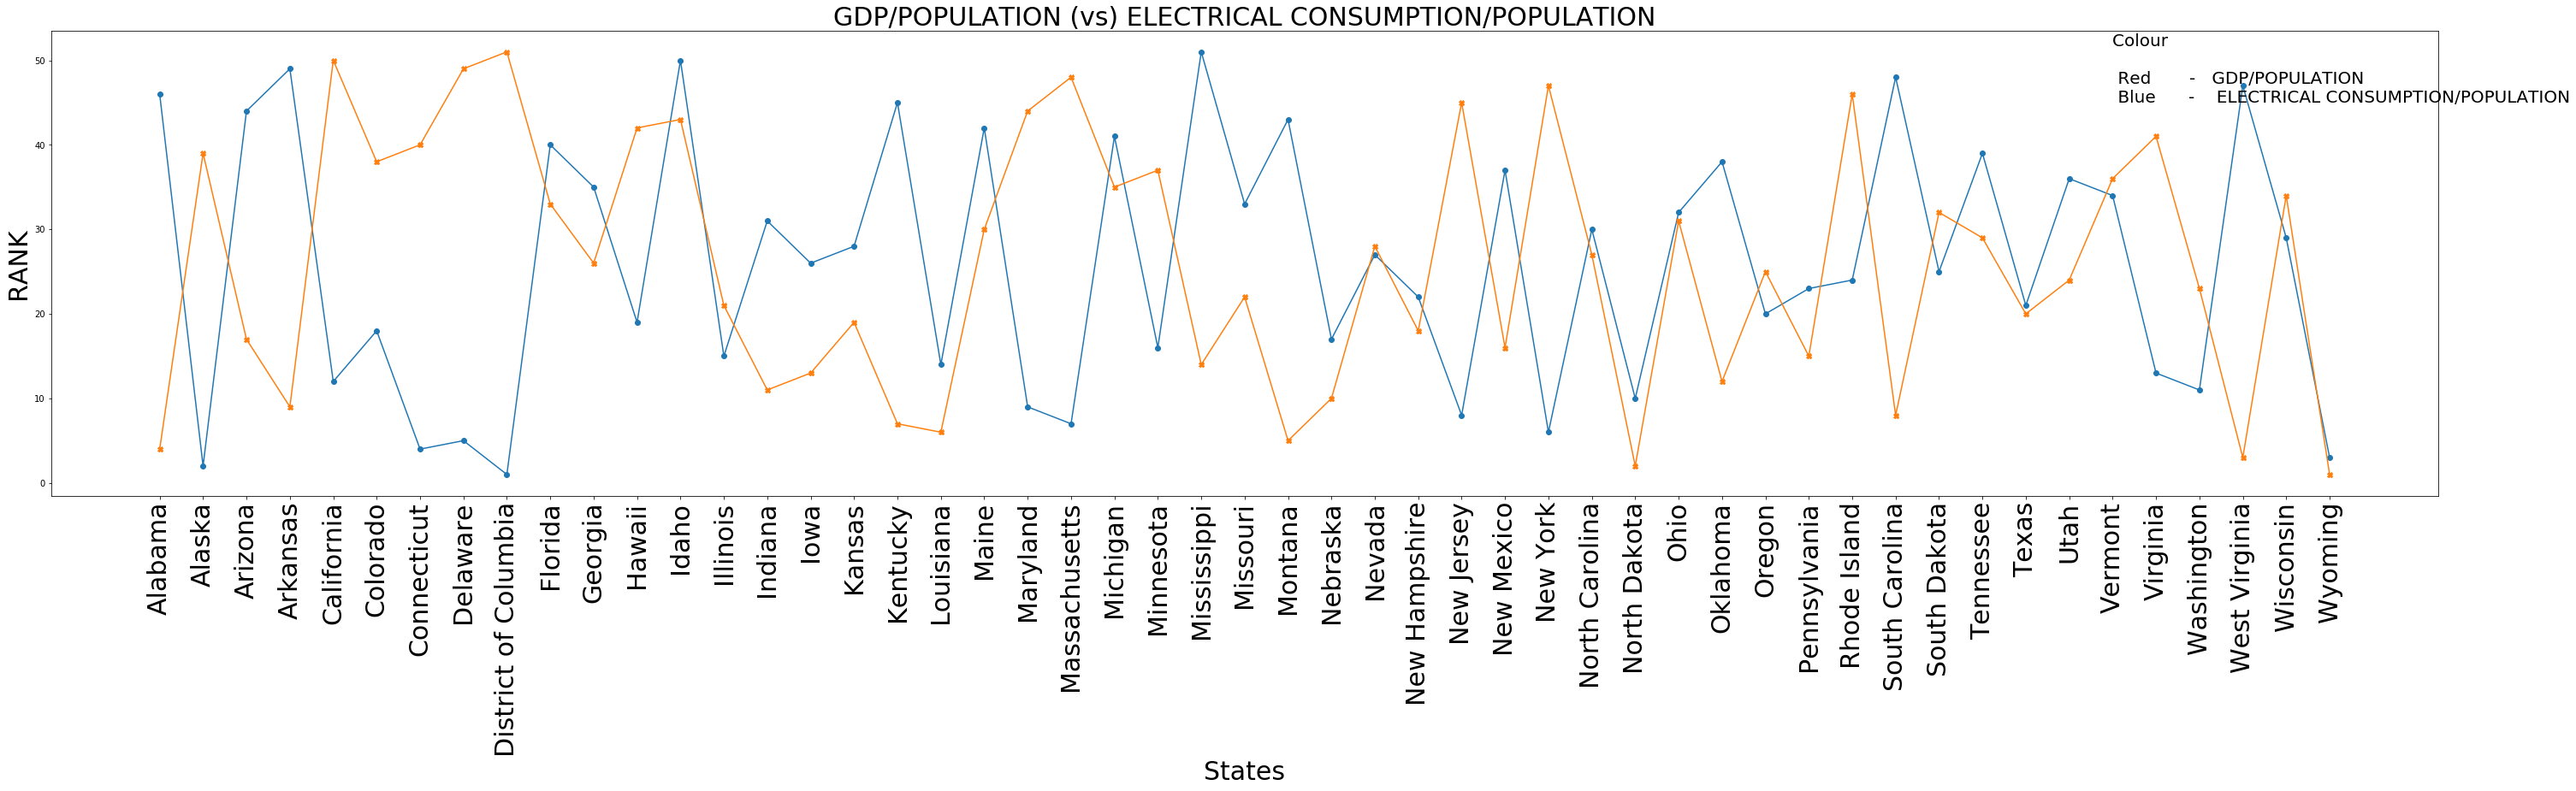

In [49]:
# Size of graph
f, ax = plt.subplots(figsize=(50,10))
plt.style.use('ggplot')
#x = np.linspace(0.0,100,50)
# Title
plt.title("GDP/POPULATION (vs) ELECTRICAL CONSUMPTION/POPULATION", fontsize=30)
# X-label
plt.xlabel("States", fontsize=30)
# Y-Label
plt.ylabel("RANK", fontsize=30)
plt.xticks(rotation='vertical',size=30)
#Plotting Rank of GDP/POPULATION
y1=plt.plot(df_final1['Area'],df_final1['RANK1'],'-o')
#Plotting Rank of ELECTRICAL CONSUMPTION/POPULATION
y2=plt.plot(df_final1['Area'],df_final1['RANK2'],'-X')
plt.text(45,45,'Colour       \n \n Red       -   GDP/POPULATION\n Blue      -    ELECTRICAL CONSUMPTION/POPULATION',size=20)

plt.show()

In the above graph, I tried to compare the GDP/POPULATION rank of each state (vs) ELECTRIC CONSUMPTION of each states rank.
But I think in most of the cases,ascending order of Electric Consumption per capita of a state is not same as that of ascending order of GDP per capita of the states .

When I have looked back into my data I have taken the values of power generated per each state. But I actually have to take power consumed by each state as a state can produce more electricy than its requirements due to more natural resources as well as a state can always buy some electricity from other states when it doesnt have enough resources to generate power.

Question 2:
    Will the pollutants per square mile of the states with higher GDP be more?

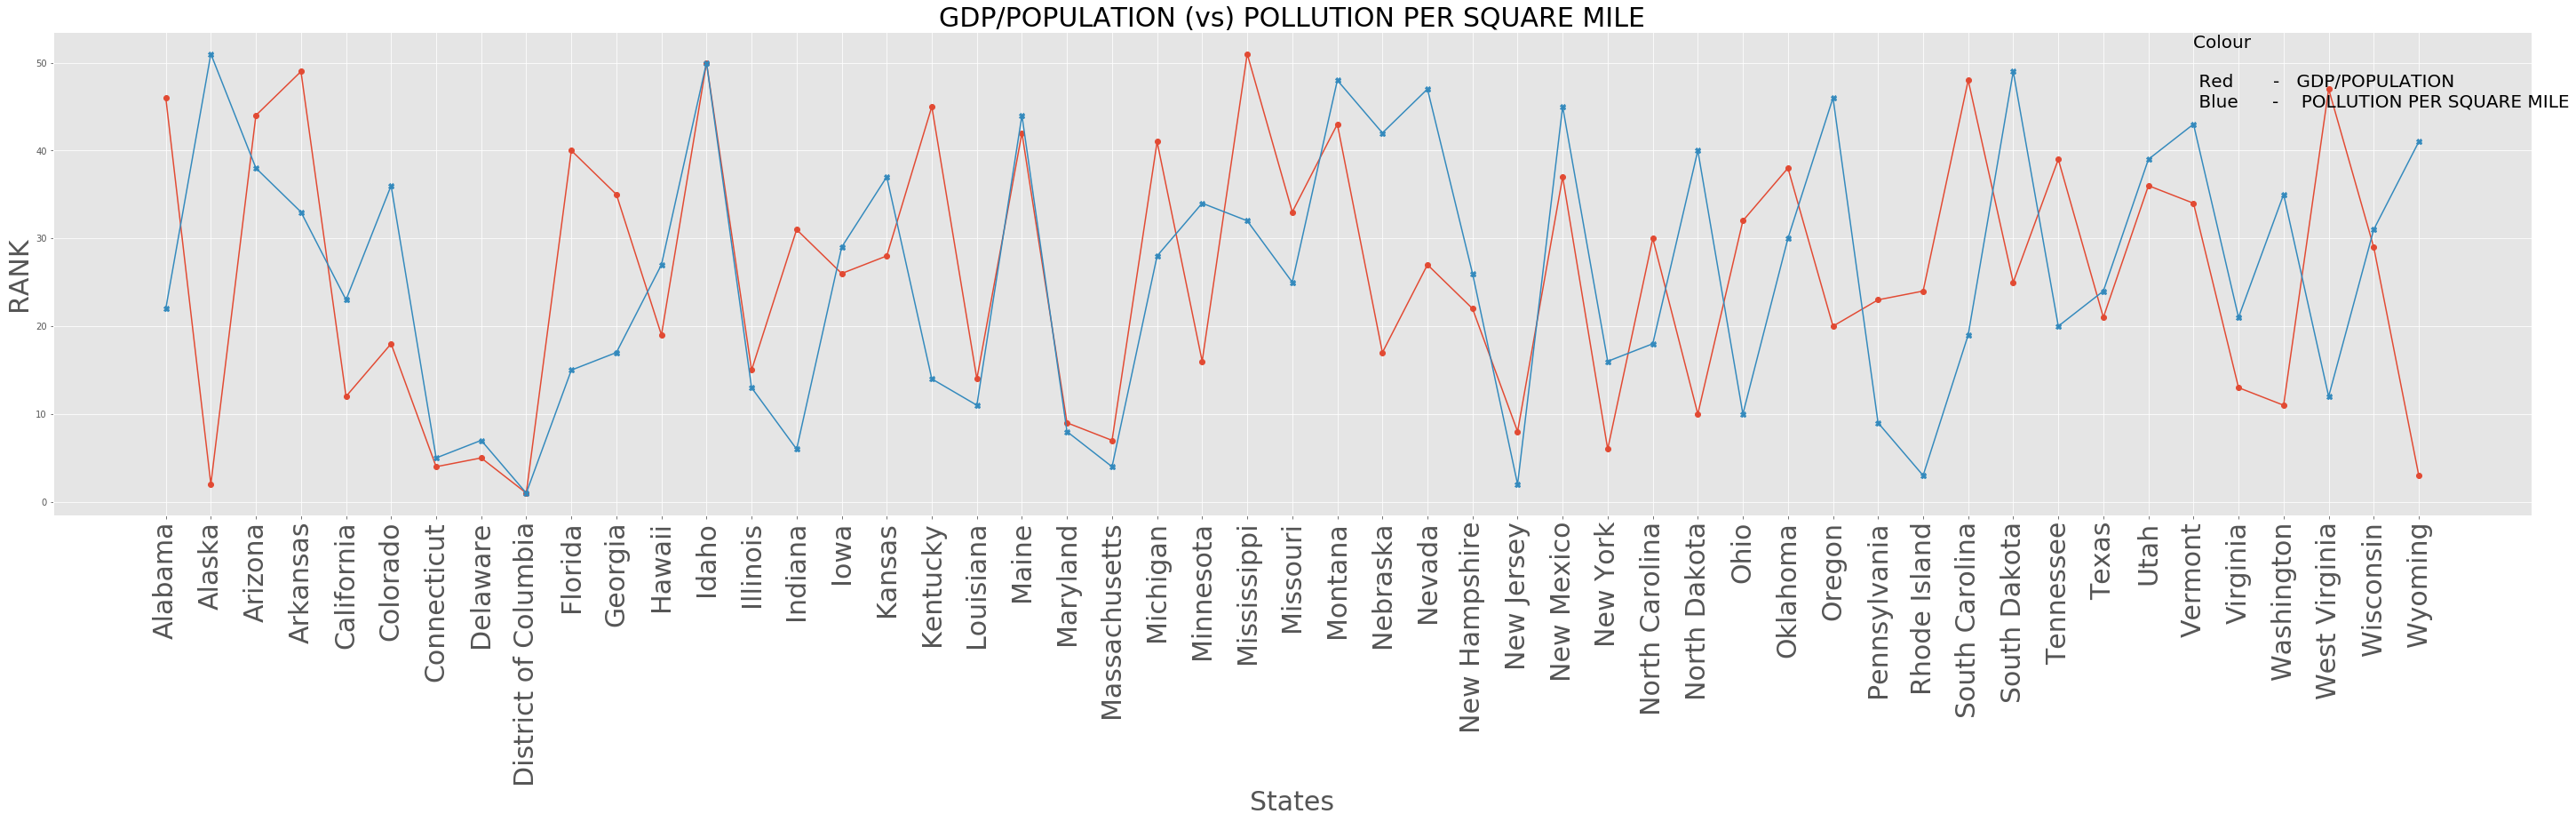

In [50]:
f, ax = plt.subplots(figsize=(50,10))
plt.style.use('ggplot')
#Title
plt.title("GDP/POPULATION (vs) POLLUTION PER SQUARE MILE", fontsize=30)
#X-label
plt.xlabel("States", fontsize=30)
#Y-label
plt.ylabel("RANK", fontsize=30)
plt.xticks(rotation='vertical',size=30)
#Plotting Rank of GDP/POPULATION
plt.plot(df_final1['Area'],df_final1['RANK1'],'-o')
#Plotting Rank of POLLUTION PER SQUARE MILE
plt.plot(df_final1['Area'],df_final1['RANK3'],'-X')
plt.text(45,45,'Colour       \n \n Red       -   GDP/POPULATION\n Blue      -    POLLUTION PER SQUARE MILE',size=20)



plt.show()

If you observe the above graph, we can obsrve that both the Ranks of GDP/POPULATION and POLLUTION per SQUARE MILE are almost changing in similar manner. To make it more clear, I have drawn an other line graph.

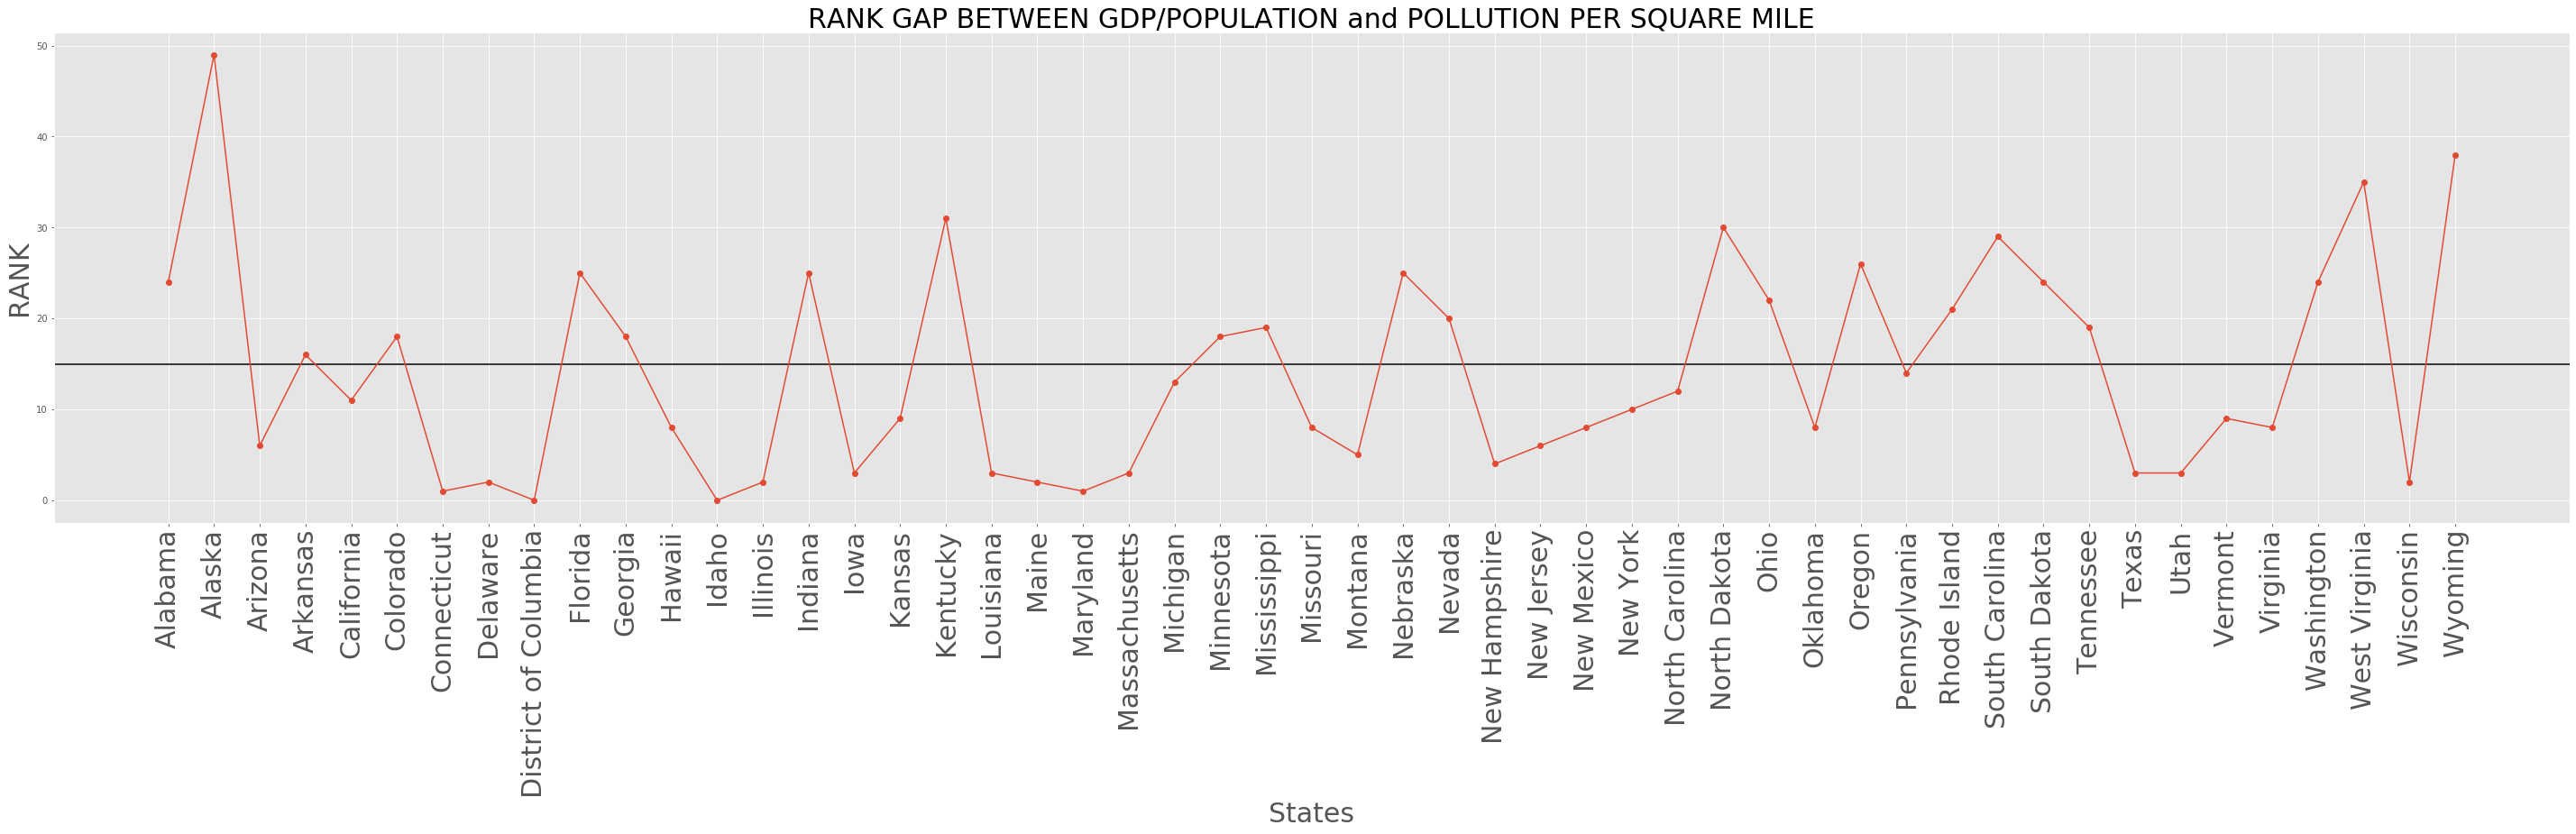

In [51]:
f, ax = plt.subplots(figsize=(50,10))
plt.style.use('ggplot')
plt.title("RANK GAP BETWEEN GDP/POPULATION and POLLUTION PER SQUARE MILE", fontsize=30)
plt.xlabel("States", fontsize=30)
plt.ylabel("RANK", fontsize=30)
plt.axhline(y=15,color='black')
plt.xticks(rotation='vertical',size=30)
plt.plot(df_final1['Area'],abs(df_final1['RANK1']-df_final1['RANK3']),'-o')


plt.show()

This graph takes the absolute difference between ranks of GDP/POPULATION and POLLUTION PER SQUARE MILE.
I have drawn a line at y=10 and you can see that most of the differrences betwween the ranks lies below and almost above 10.There can be some exceptions with some states due to many other factors
So, We can conclude that for the states with higher GDP per capita are the states which emits more pollution.